In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from luwiji.knn import illustration, demo

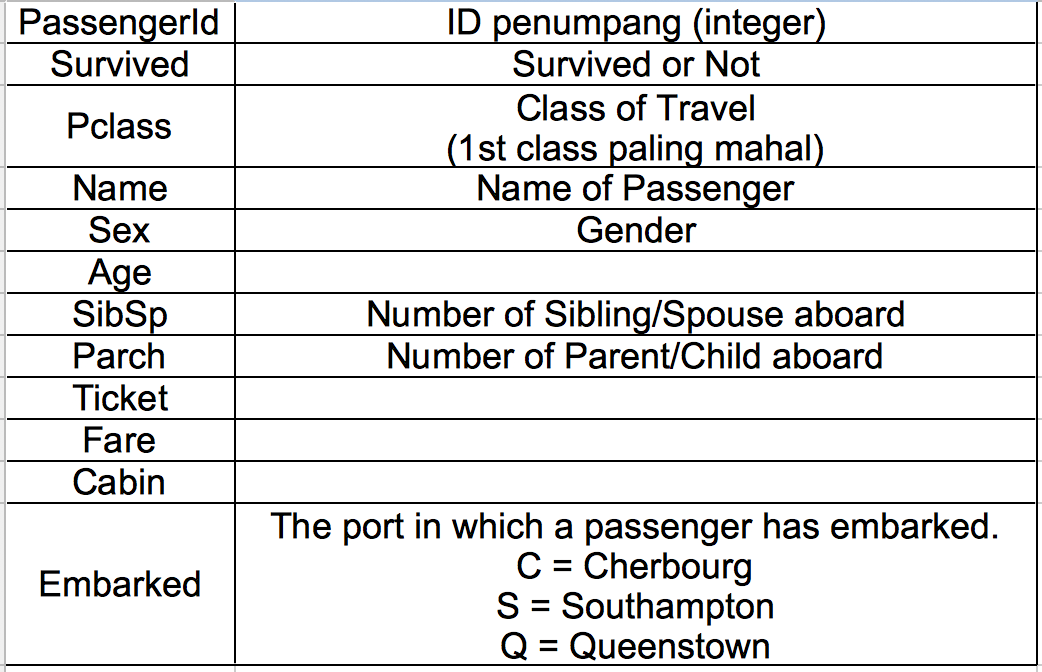

In [2]:
illustration.nomenklatur

In [3]:
df = pd.read_csv("data/titanic.csv", index_col="PassengerId")

In [4]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.drop(columns=["Name", "Ticket"], inplace=True) #menghilangkan kolom nama dan tiket karna tidak terlalu berpengaruh thdp keselamatan

In [18]:
df.drop(columns=["Ticket"], inplace=True) #menghilangkan kolom nama dan tiket karna tidak terlalu berpengaruh thdp keselamatan

In [6]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,NaN,S
2,1,1,female,38.0,1,0,71.2833,C85,C
3,1,3,female,26.0,0,0,7.9250,NaN,S
4,1,1,female,35.0,1,0,53.1000,C123,S
5,0,3,male,35.0,0,0,8.0500,NaN,S


# Quick Exploratory Data Analysis (Quick EDA)

In [7]:
from jcopml.plot import plot_missing_value

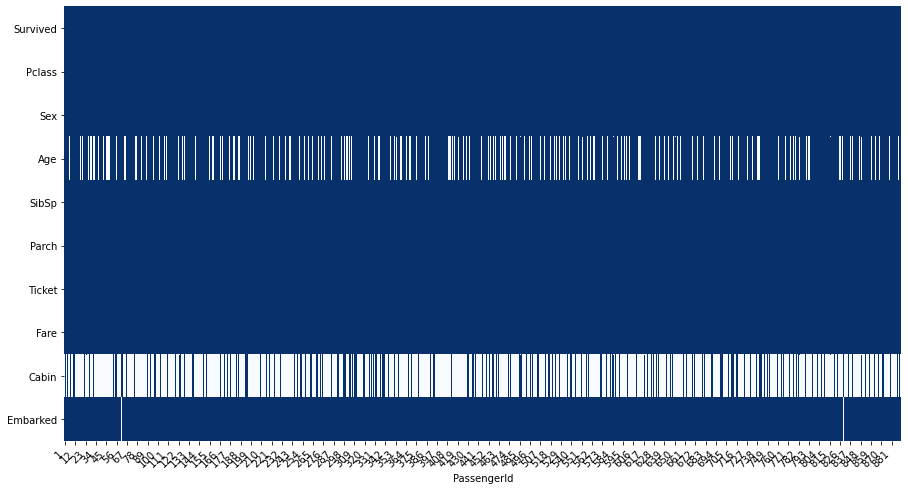

In [12]:
plot_missing_value(df)

In [8]:
df.drop(columns=["Age", "Cabin"], inplace=True)

In [9]:
df.Embarked.value_counts() #Melihat data yang banyak kosong adalah data age dan cabin, maka kita hapus saja 

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [10]:
df.fillna({"Embarked": "S"}, inplace=True)

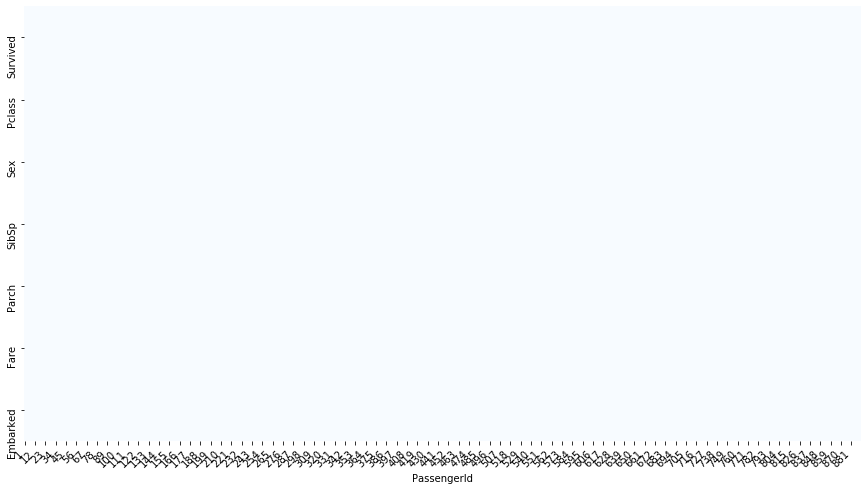

In [11]:
plot_missing_value(df)

# Persiapan Data

In [12]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,0,3,male,1,0,7.2500,S
2,1,1,female,1,0,71.2833,C
3,1,3,female,0,0,7.9250,S
4,1,1,female,1,0,53.1000,S
5,0,3,male,0,0,8.0500,S


In [15]:
# X adalah data input/feature dan y adalah data target/label
X = df.drop(columns="Survived") # X adalah semua kolom kecuali data kolom survived, karena kolom survived adalah target/label  
y = df.Survived

X = pd.get_dummies(X, columns=["Pclass", "Sex", "Embarked"]) #data kategorikal di encode one hot coding dengan fungsi dummies karna mesin hanya menerima data inputan numerikal

In [16]:
X

,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
1,1,0,7.2500,0,0,1,0,1,0,0,1
2,1,0,71.2833,1,0,0,1,0,1,0,0
3,0,0,7.9250,0,0,1,1,0,0,0,1
4,1,0,53.1000,1,0,0,1,0,0,0,1
5,0,0,8.0500,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
887,0,0,13.0000,0,1,0,0,1,0,0,1
888,0,0,30.0000,1,0,0,1,0,0,0,1
889,1,2,23.4500,0,0,1,1,0,0,0,1


In [17]:
y

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64

# Intro Scikit-learn

In [18]:
from sklearn.neighbors import KNeighborsClassifier
#target kita kategorik jadi pakai classifier bukan regression (utk target numerik)

In [27]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [28]:
knn.score(X, y)

0.8933782267115601

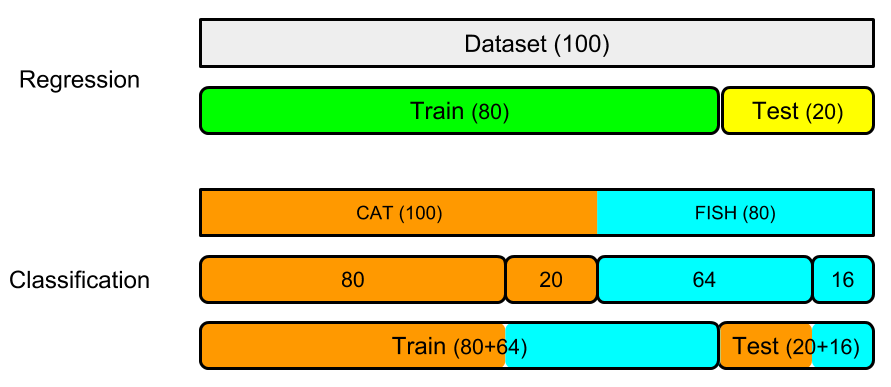

In [29]:
illustration.train_test_split

In [31]:
from sklearn.model_selection import train_test_split

In [35]:
X = df.drop(columns="Survived") # X adalah semua kolom kecuali data kolom survived, karena kolom survived adalah target/label  
y = df.Survived

X = pd.get_dummies(X, columns=["Pclass", "Sex", "Embarked"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42) #pada kasus klasifikasi stratify shuffle split dibuat pada target, untuk selang seling berdasarkan target, menjamin data testing representatif, ketika data diuji semua target ada 
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 11), (179, 11), (712,), (179,))

In [36]:
knn = KNeighborsClassifier(n_neighbors=1) #melihat ada berapa tetangga yang ingin dilihat
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [37]:
knn.score(X_test, y_test)

0.7039106145251397

# Concept 2: K-fold Cross Validation

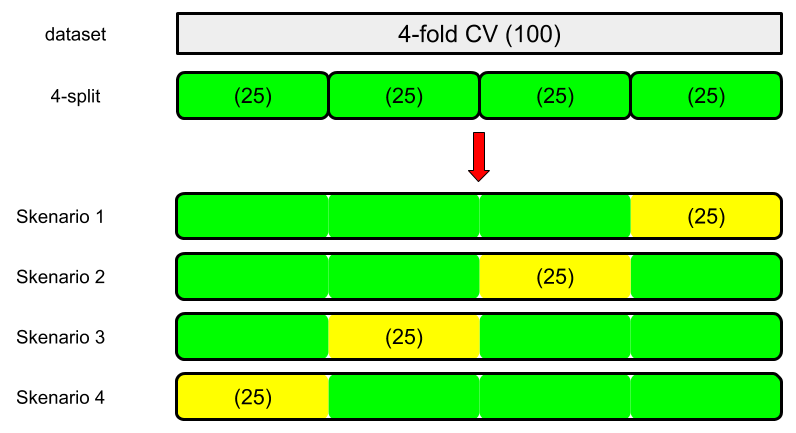

In [90]:
illustration.kfold_cv

In [91]:
from sklearn.model_selection import cross_val_score

In [92]:
knn = KNeighborsClassifier(n_neighbors=1) #melihat ada berapa tetangga yang ingin dilihat
cross_val_score(knn, X, y, cv=5) #cv atau cross validation dibagi menjadi 5 data score

array([0.62569832, 0.65168539, 0.83146067, 0.7752809 , 0.74719101])

In [93]:
cross_val_score(knn, X, y, cv=5).mean()

0.7262632603100874

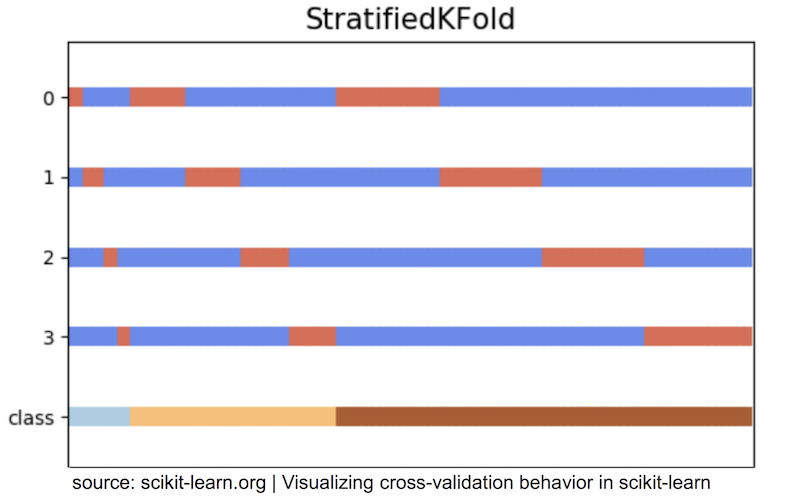

In [94]:
#sangat banyak splitting untuk cross validation bisa dicek di web nya sklearn kfold yang tujuann utamanya adalah untuk membuat bebrapa skenario
illustration.strat_kfold_cv

# Improvement melalui data: Feature Scalling

In [39]:
demo.knn_scaling()

interactive(children=(IntSlider(value=1, description='N', max=11, min=1, step=2), FloatSlider(value=7000000.0,…

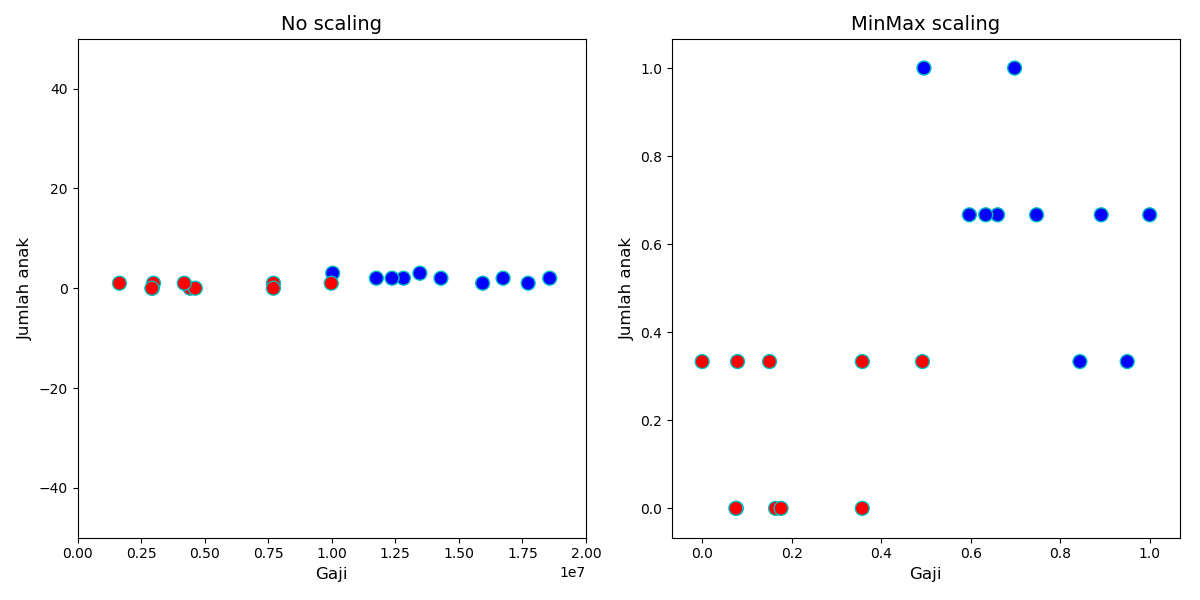

In [40]:
illustration.knn_scaling

In [41]:
from sklearn.preprocessing import MinMaxScaler

In [42]:
scaler = MinMaxScaler() # fungsi minmax adalah untuk menyesuaikan data yang terlalu jauh jaraknya, seperti contoh data gaji dan umur diatas, diperkecil dgn rumus minmax agar skalaa menjadi 0-1
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train) # variabel X_train_scaled adalah data dari xtrain yang di transform dengan fungsi minmax
X_test_scaled = scaler.transform(X_test)

In [43]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [44]:
knn.score(X_train_scaled, y_train), knn.score(X_test_scaled, y_test)

(0.9157303370786517, 0.7150837988826816)

# Improvement melalui model: Parameter tuning

### Tuning n_neighbor tanpa scalling

In [46]:
#Mencoba improve pada model dengan cara melihat-lihat atau mengubah jumlah neighbor atau tetangga untuk melihat accuracy yg terbaik
neighbor = range(1, 51, 2)
train_score = []
test_score = []

for k in neighbor:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    train_score.append(knn.score(X_train, y_train))
    test_score.append(knn.score(X_test, y_test))

In [47]:
train_score

[0.9157303370786517,
 0.8623595505617978,
 0.8455056179775281,
 0.8286516853932584,
 0.800561797752809,
 0.7851123595505618,
 0.7851123595505618,
 0.7808988764044944,
 0.7794943820224719,
 0.7654494382022472,
 0.7528089887640449,
 0.7528089887640449,
 0.7429775280898876,
 0.7401685393258427,
 0.7485955056179775,
 0.7443820224719101,
 0.7429775280898876,
 0.7485955056179775,
 0.7471910112359551,
 0.7528089887640449,
 0.7345505617977528,
 0.7303370786516854,
 0.7191011235955056,
 0.7247191011235955,
 0.7134831460674157]

In [48]:
test_score

[0.7039106145251397,
 0.7541899441340782,
 0.7206703910614525,
 0.7150837988826816,
 0.7318435754189944,
 0.7094972067039106,
 0.7094972067039106,
 0.7039106145251397,
 0.7094972067039106,
 0.7206703910614525,
 0.7039106145251397,
 0.7039106145251397,
 0.6983240223463687,
 0.6983240223463687,
 0.6927374301675978,
 0.7039106145251397,
 0.6703910614525139,
 0.6759776536312849,
 0.659217877094972,
 0.6703910614525139,
 0.6256983240223464,
 0.6368715083798883,
 0.6145251396648045,
 0.6256983240223464,
 0.6312849162011173]

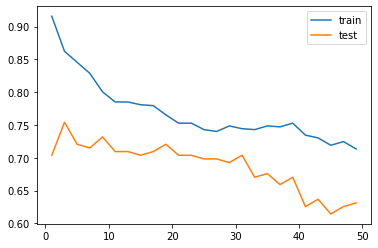

In [49]:
plt.plot(neighbor, train_score, label="train")
plt.plot(neighbor, test_score, label="test")
plt.legend()

In [50]:
print(f"Max test score: {np.max(test_score)}")
print(f"n_neighbor: {neighbor[np.argmax(test_score)]}")

Max test score: 0.7541899441340782
n_neighbor: 3


### Terlihat pada data diatas model terbaik yaitu memakai 3 n_neighbor

Max test score: 0.7541899441340782
n_neighbor: 3


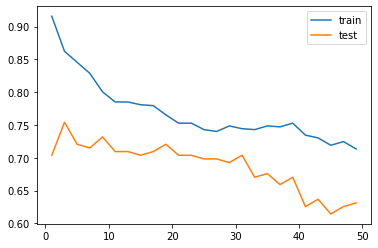

In [106]:
#Mencoba improve pada model dengan cara melihat-lihat atau mengubah jumlah neighbor atau tetangga untuk melihat accuracy yg terbaik
neighbor = range(1, 51, 2)
train_score = []
test_score = []

for k in neighbor:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    train_score.append(knn.score(X_train, y_train))
    test_score.append(knn.score(X_test, y_test))
    
plt.plot(neighbor, train_score, label="train")
plt.plot(neighbor, test_score, label="test")
plt.legend()

print(f"Max test score: {np.max(test_score)}")
print(f"n_neighbor: {neighbor[np.argmax(test_score)]}")

### Tuning n_neighbor dengan scalling

Max test score: 0.7988826815642458
n_neighbor: 29


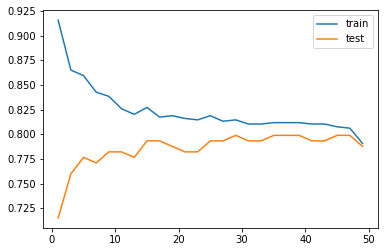

In [52]:
neighbor = range(1, 51, 2)
train_score = []
test_score = []

for k in neighbor:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    
    train_score.append(knn.score(X_train_scaled, y_train))
    test_score.append(knn.score(X_test_scaled, y_test))
    
plt.plot(neighbor, train_score, label="train")
plt.plot(neighbor, test_score, label="test")
plt.legend()

print(f"Max test score: {np.max(test_score)}")
print(f"n_neighbor: {neighbor[np.argmax(test_score)]}")

### Tuning n_neighbor dengan weight by distance

Max test score: 0.7988826815642458
n_neighbor: 49


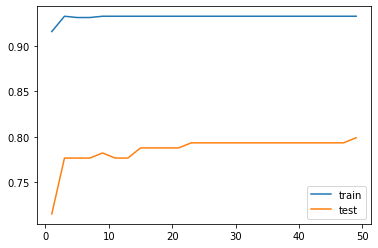

In [53]:
neighbor = range(1, 51, 2)
train_score = []
test_score = []

for k in neighbor:
    knn = KNeighborsClassifier(n_neighbors=k, weights="distance") #weight=distance dibobotkan berdasarkan jarak (shft tab utk info lebih lanjut)
    knn.fit(X_train_scaled, y_train)
    
    train_score.append(knn.score(X_train_scaled, y_train))
    test_score.append(knn.score(X_test_scaled, y_test))
    
plt.plot(neighbor, train_score, label="train")
plt.plot(neighbor, test_score, label="test")
plt.legend()

print(f"Max test score: {np.max(test_score)}")
print(f"n_neighbor: {neighbor[np.argmax(test_score)]}")

### pakai Manhattan Distance

Max test score: 0.7932960893854749
n_neighbor: 23


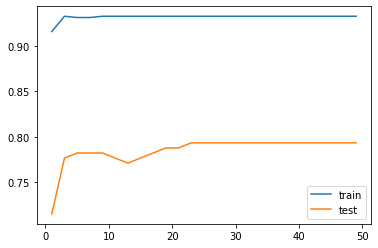

In [109]:
neighbor = range(1, 51, 2)
train_score = []
test_score = []

for k in neighbor:
    knn = KNeighborsClassifier(n_neighbors=k, weights="distance", p=1)
    knn.fit(X_train_scaled, y_train)
    
    train_score.append(knn.score(X_train_scaled, y_train))
    test_score.append(knn.score(X_test_scaled, y_test))
    
plt.plot(neighbor, train_score, label="train")
plt.plot(neighbor, test_score, label="test")
plt.legend()

print(f"Max test score: {np.max(test_score)}")
print(f"n_neighbor: {neighbor[np.argmax(test_score)]}")